In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

import tensorflow as tf

In [2]:
tf.random.set_seed(4445444)

In [3]:
train_df = pd.read_csv('archive/train.csv')
test_df = pd.read_csv('archive/test.csv')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [6]:
y_train = train_df['Activity'].copy()
X_train = train_df.drop('Activity', axis=1).copy()

y_test = test_df['Activity'].copy()
X_test = test_df.drop('Activity', axis=1).copy()


In [7]:
y_train.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [8]:
num_classes = 6

In [9]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

In [10]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 562)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                36032     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 40,582
Trainable params: 40,582
Non-trainable params: 0
_________________________________________________________________


In [13]:
batch_size = 32
epochs = 25

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ModelCheckpoint('./model.h5', save_best_only=True),
        tf.keras.callbacks.ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.1,
            patience=1
        )
    ]
)

Epoch 1/25
184/184 [==============================] - 1s 8ms/step - loss: 0.6150 - accuracy: 0.7900 - val_loss: 0.2937 - val_accuracy: 0.9218
Epoch 2/25
184/184 [==============================] - 1s 4ms/step - loss: 0.2392 - accuracy: 0.9104 - val_loss: 0.1926 - val_accuracy: 0.9205
Epoch 3/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1636 - accuracy: 0.9383 - val_loss: 0.2388 - val_accuracy: 0.9137
Epoch 4/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1160 - accuracy: 0.9631 - val_loss: 0.1599 - val_accuracy: 0.9388
Epoch 5/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1104 - accuracy: 0.9638 - val_loss: 0.1496 - val_accuracy: 0.9388
Epoch 6/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.9640 - val_loss: 0.1508 - val_accuracy: 0.9381
Epoch 7/25
184/184 [==============================] - 1s 3ms/step - loss: 0.1035 - accuracy: 0.9670 - val_loss: 0.1482 - val_accuracy: 0.9375
Epoch 

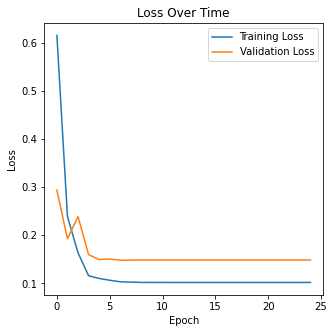

In [17]:
plt.figure(figsize=(5, 5))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(
    epochs_range,
    train_loss,
    label="Training Loss"
)

plt.plot(
    epochs_range,
    val_loss,
    label="Validation Loss"
)

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.title("Loss Over Time")

plt.show()

In [15]:
model.load_weights('./model.h5')
model.evaluate(X_test, y_test)

93/93 [==============================] - 0s 1ms/step - loss: 0.1936 - accuracy: 0.9267


[0.1936095803976059, 0.9267051219940186]